In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

data=pd.read_csv('BCS05hr_reduced.txt',delimiter='\s+')
print(data)
column_headers = list(data.columns.values)
print("The Column Header :", column_headers)

data['spread_model']

data1= data[data['r-mag']>=17]
data1= data1[data1['r-mag']<=20]
data1=data1[data1['spread_model']>0.002]
print(data1)

             #RA        DEC    r-mag  spread_model  spread_model_err
0      76.709724 -56.091484  22.2622      0.113884          0.002812
1      77.430664 -56.090149  23.8355      0.186889          0.003559
2      76.937309 -56.092442  17.7021      0.000614          0.000120
3      77.344833 -56.089947  23.7293      0.117396          0.000751
4      77.416412 -56.089119  23.4456      0.192760          0.004764
...          ...        ...      ...           ...               ...
49995  77.138313 -53.850994  16.4224      0.000928          0.004025
49996  76.861160 -53.846672  22.1385      0.076647          0.018807
49997  76.892189 -53.855347  20.5829      0.013071         -0.001716
49998  77.500732 -53.853760  20.7490      0.017413         -0.000761
49999  77.139778 -53.854607  21.6471      0.038710          0.059438

[50000 rows x 5 columns]
The Column Header : ['#RA', 'DEC', 'r-mag', 'spread_model', 'spread_model_err']
             #RA        DEC    r-mag  spread_model  spread_model_e

In [2]:
print(len(data1['r-mag']))
print(len(data1['spread_model']))

2708
2708


@pickle_results: using precomputed results from 'correlation_functions.pkl'


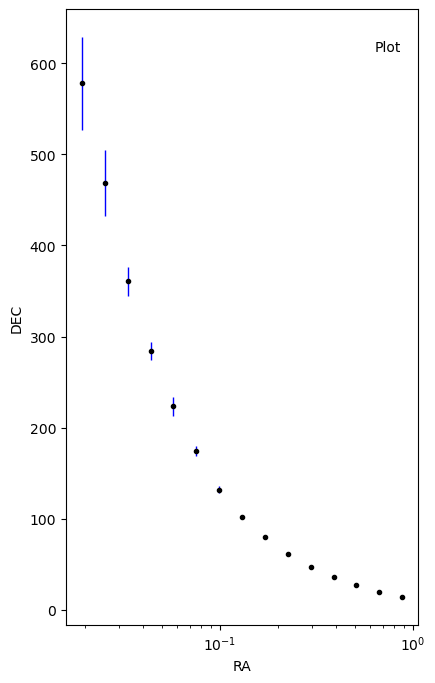

In [11]:
@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(1), 16)

    results = [bins]

    results += bootstrap_two_point_angular(data1['#RA'],data1['DEC'],bins=bins,method=method,Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
corr = r_corr
corr_err = r_corr_err
bootstraps = r_bootstraps
labels ="Plot"
#           

fig = plt.figure(figsize=(10, 8))

#keeping log scale log and yscale linear
ax = fig.add_subplot(121 , xscale='log', yscale='linear')

ax.errorbar(bin_centers, corr, corr_err,
                fmt='.k', ecolor='b', lw=1)


ax.text(0.95, 0.95, labels,ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel(r'RA')
ax.set_ylabel(r'DEC')
plt.show()